In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = "C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/training_set"
valid_path = "C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/testing_set"

In [3]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg19.layers:
    layer.trainable = False

In [5]:
folders = glob('C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/training_set/*')

In [6]:
folders

['C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/training_set\\Parasitized',
 'C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/training_set\\Uninfected']

In [7]:
# x = Flatten()(vgg19.output)

In [8]:
# prediction = Dense(len(folders), activation='softmax')(x)

# # create a model object
# model = Model(inputs=vgg19.input, outputs=prediction)

In [9]:
# model.summary()

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(300,activation='relu'))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory("C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/training_set",
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory("C:/Users/N CH SHANMUKHA/Downloads/Malaria Cells/testing_set",
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 15832 images belonging to 2 classes.


In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set)//4,
  validation_steps=len(test_set)//4
)

<ipython-input-21-79871898db29>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
107/107 [==============================] - 137s 1s/step - loss: 0.7181 - accuracy: 0.6503 - val_loss: 0.4736 - val_accuracy: 0.7943
Epoch 2/15
107/107 [==============================] - 136s 1s/step - loss: 0.3458 - accuracy: 0.8657 - val_loss: 0.2196 - val_accuracy: 0.9221
Epoch 3/15
107/107 [==============================] - 135s 1s/step - loss: 0.2230 - accuracy: 0.9220 - val_loss: 0.1891 - val_accuracy: 0.9305
Epoch 4/15
107/107 [==============================] - 136s 1s/step - loss: 0.2170 - accuracy: 0.9289 - val_loss: 0.1843 - val_accuracy: 0.9297
Epoch 5/15
107/107 [==============================] - 135s 1s/step - loss: 0.1993 - accuracy: 0.9353 - val_loss: 0.1855 - val_accuracy: 0.9378
Epoch 6/15
107/107 [==============================] - 135s 1s/step - loss: 0.2011 - accuracy: 0.9378 - val_loss: 0.1662 - val_accuracy: 0.9410
Epoch 7/15
107/107 [==============================] - 135s 1s/step - loss: 0.1721 - accuracy: 0.9440 - val_loss: 0.1615 - val_accuracy: 0.9462

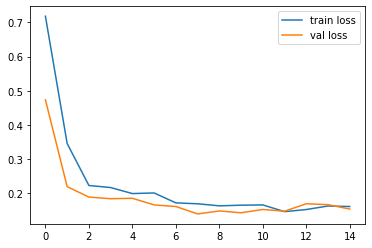

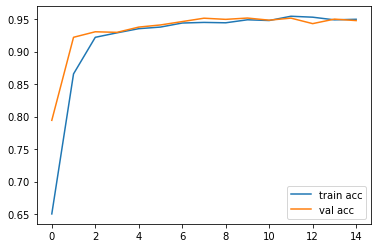

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model

model.save('model_vgg19_new.h5')
y_pred = model.predict(test_set)
y_pred

array([[0.00223917, 0.9977608 ],
       [0.9848706 , 0.01512932],
       [0.99592555, 0.00407453],
       ...,
       [0.998563  , 0.00143701],
       [0.02753311, 0.9724668 ],
       [0.01219503, 0.987805  ]], dtype=float32)

In [24]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19_new.h5')
img=image.load_img('D:/test.png',target_size=(224,224))
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
